here we will try to plot parts of the weighted graph we have created

https://www.reddit.com/r/Python/comments/92nscj/how_to_plot_weighted_graph_using_networkx/


https://gephi.org/

In [4]:
import pandas as pd
import os
import sys
import pathlib
import numpy as np
path_to_harz = pathlib.Path(
    r"C:\Users\oleh.bakumenko\PythonWorkspace\PycharmProjects\sandbox\harz")
all_stamps = pd.read_excel(os.path.join(
    path_to_harz, 'excel', 'HWN2024_export_gpx.xlsx'))
all_distances = np.load(os.path.join(
    path_to_harz, 'arrays', 'all_stamps_distances.npy'))

In [91]:
num_elements = 10
max_distance = 3000
plot_part = all_distances[:num_elements, :num_elements]
plot_part = np.where(plot_part > max_distance, np.inf, plot_part)

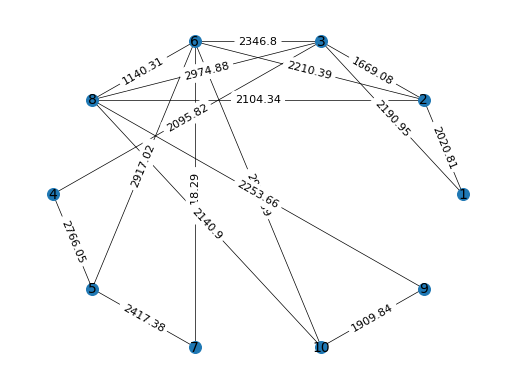

: 

In [96]:
import matplotlib.pyplot as plt
import networkx as nx

# create a string vector with the node names (1, 2, 3, ..., num_elements)
node_names = [str(i) for i in range(1, num_elements + 1)]
G = nx.Graph()

for row, name in zip(plot_part, node_names):
    for i, distance in enumerate(row):
        if distance == 0:
            pass
        elif distance == np.inf:
            pass
        else:
            G.add_edge(name, node_names[i], weight=distance)

# positions for all nodes - seed for reproducibility
pos = nx.circular_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=70)

# edges
nx.draw_networkx_edges(G, pos, width=0.5)


# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
# edge weight labels
plot_weights = True
if plot_weights:
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

ax = plt.gca()
# ax.margins(0.08)
plt.axis("off")
# plt.tight_layout()
plt.show()